## 1. Machine Learning Part II

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [45]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [46]:
path = '/Users/mdiaz/Desktop/NWWS data/Data'

In [47]:
df = pd.read_csv(os.path.join(path, 'Prepared', 'Clean NWWS.csv'))

In [48]:
df.shape

(846, 8)

In [49]:
df.head()

,state,id,county names,population_served,collection date,15dy percent change,percentile,current percentile levels
0,Hawaii,710,Kauai,10000,2022-12-27,5649.0,28,2
1,Maryland,547,Howard,270000,2022-12-27,-48.0,53,58
2,New York,426,Orange,6729,2022-12-27,-99.0,53,64
3,Oregon,932,Deschutes,92850,2022-12-27,-100.0,15,0
4,Oregon,956,Jackson,133708,2022-12-27,-70.0,20,0


In [50]:
# As we can see, there is plenty of categorical data, so we need to keep only the numerical one
df2 = df.drop(columns =['state','county names','collection date'])

In [51]:
df2

,id,population_served,15dy percent change,percentile,current percentile levels
0,710,10000,5649.0,28,2
1,547,270000,-48.0,53,58
2,426,6729,-99.0,53,64
3,932,92850,-100.0,15,0
4,956,133708,-70.0,20,0
...,...,...,...,...,...
841,977,37125,192.0,59,60
842,950,37725,-100.0,11,0
843,735,6071,-95.0,84,84
844,1709,890000,-23.0,78,78


### 2. The elbow technique

In [52]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data 

kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [53]:
# Now, create a score for each of the ranges created..
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 

score

[-1.8359445881290195e+19,
 -191549250556880.44,
 -90665696816589.28,
 -34959861209499.523,
 -15149766765463.055,
 -9443191666136.664,
 -6319363585161.923,
 -4548654989890.4795,
 -3218272548267.3535]

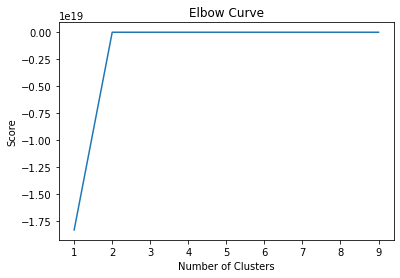

In [54]:
# And finally, create the elbow graph
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The breaking point of the curve is quite shapr, ranging between 1 and 2, meaning that we are going to have to use one of those values. This means that the optimal count for your clusters is two, although not ideal for this exercise, but these numbers are quite steep since there are many biases. 

### 3. K-means clustering

In [55]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [56]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=3)

In [57]:
df2['clusters'] = kmeans.fit_predict(df2)

In [58]:
df2.head()

,id,population_served,15dy percent change,percentile,current percentile levels,clusters
0,710,10000,5649.0,28,2,0
1,547,270000,-48.0,53,58,0
2,426,6729,-99.0,53,64,0
3,932,92850,-100.0,15,0,0
4,956,133708,-70.0,20,0,0


In [59]:
df2['clusters'].value_counts()


0    841
1      4
2      1
Name: clusters, dtype: int64

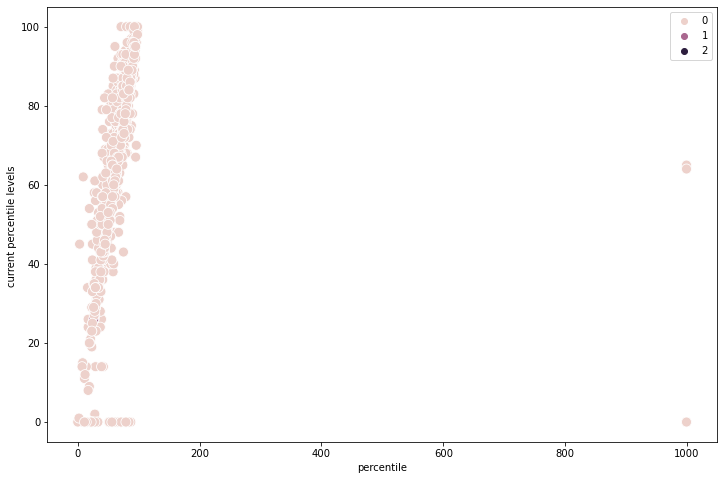

In [60]:
# Plot the clusters for the "percentile" and "current percentile levels " variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['percentile'], y=df2['current percentile levels '], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('percentile') # Label x-axis.
plt.ylabel('current percentile levels ') # Label y-axis.
plt.show()

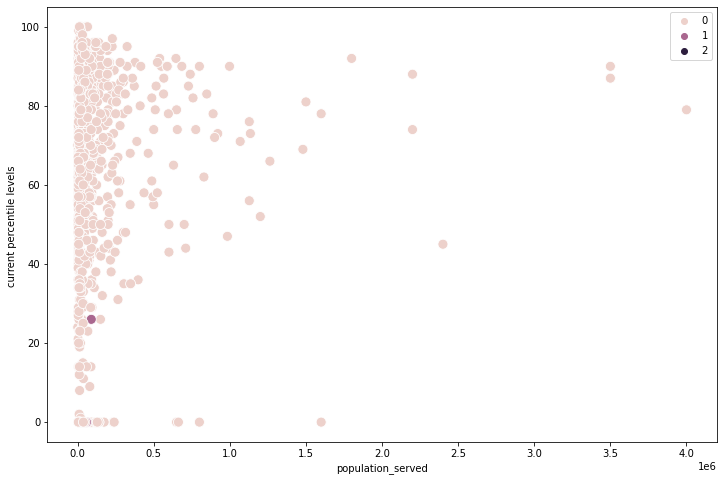

In [61]:
# Plot the clusters for the "population served" and "current percentile levels " variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['population_served'], y=df['current percentile levels '], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('population_served') 
plt.ylabel('current percentile levels ') 
plt.show()

In [69]:
df.loc[df2['clusters'] == 2, 'cluster'] = 'yellow'
df.loc[df2['clusters'] == 1, 'cluster'] = 'turquoise'
df.loc[df2['clusters'] == 0, 'cluster'] = 'teal'

In [70]:
df.groupby('cluster').agg({'population_served':['mean', 'median'], 
                         'percentile':['mean', 'median'], 
                         'current percentile levels ':['mean', 'median'],
                          '15dy percent change':['mean', 'median']})

population_served          percentile         \
                       mean   median       mean median   
cluster                                                  
teal          132024.432818  39000.0   89.69679   67.0   
turquoise      42346.250000  36392.5   41.25000   40.0   
yellow         10000.000000  10000.0   64.00000   64.0   

          current percentile levels         15dy percent change                
                                mean median                mean        median  
cluster                                                                        
teal                        62.58264   68.0        3.920564e+03 -4.200000e+01  
turquoise                   36.75000   40.0        2.147484e+09  2.147484e+09  
yellow                       0.00000    0.0        1.005323e+07  1.005323e+07

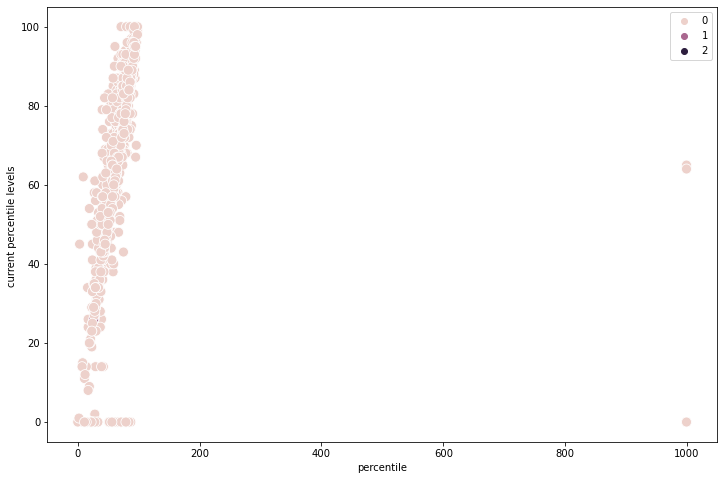

In [71]:
# Plot the clusters for the "percentile" and "current percentile levels " variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['percentile'], y=df['current percentile levels '], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('percentile') 
plt.ylabel('current percentile levels ') 
plt.show()